In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

C:\Users\PC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(f"Tensorflow Version{tf.__version__}")
print(f"keras Version{tf.keras.__version__}")

Tensorflow Version2.11.0
keras Version2.11.0


In [3]:
os.getcwd()

'C:\\Users\\PC\\Desktop\\datasciencepw'

GPU/CPU  Check

In [4]:
tf.config.list_physical_devices("GPU")

[]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list=["GPU","CPU"]
for devices in check_list:
    out=tf.config.list_physical_devices(devices)
    if len(out)>0:
        print(f'{devices} is available')
        print(f'Details>>{out}')
    else:
        print(f'{devices} is not available')
        

GPU is not available
CPU is available
Details>>[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Creating a simpler classifier using keras on MNIST data


In [7]:
mnist=tf.keras.datasets.mnist

In [8]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\PC\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [9]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
len(X_test[1][0])

28

In [14]:
#create a validation data set from the full training data 
#Scale the data between 0 to 1 by dividing it by 255 as its unsigned data between 0-255 range
X_valid,X_train=X_train[:5000]/255.,X_train[5000:]/255.
y_valid,y_train=y_train[:5000]/255.,y_train[5000:]/255.
#SCale the test set as well
X_test=X_test/255.

In [15]:
len(X_train[5000:])

50000

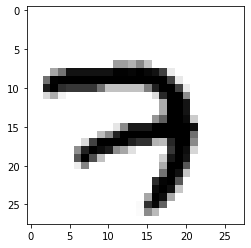

In [16]:
plt.imshow(X_train[0],cmap='binary')

<AxesSubplot:>

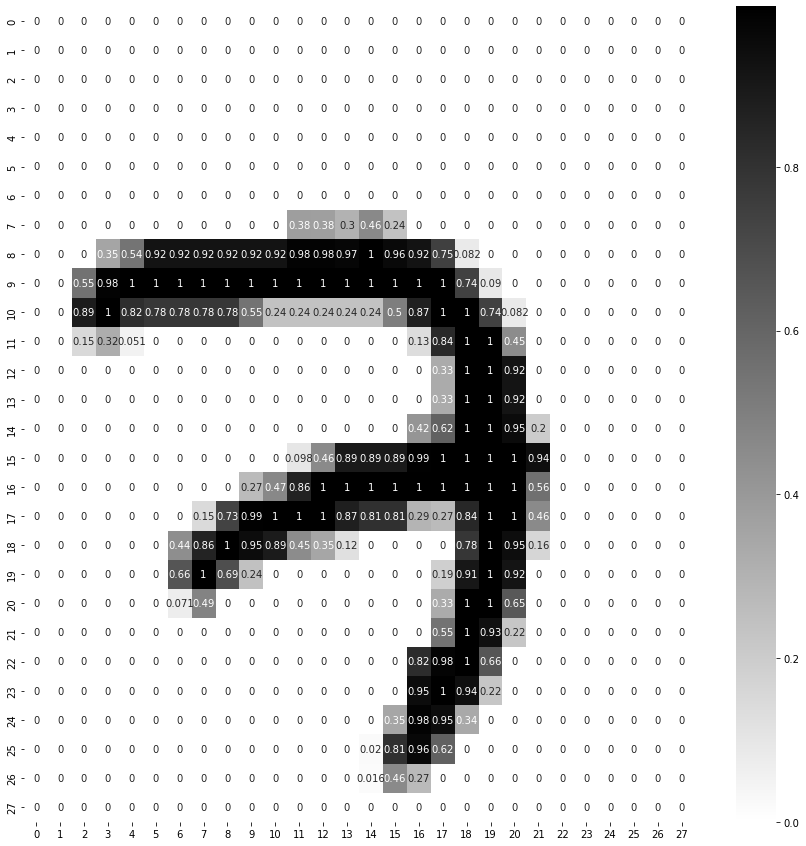

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [18]:
28*28

784

In [19]:
#Creating layers of Ann
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
       tf.keras.layers.Dense(300,activation='relu',name='hiddenLayers1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenLayers2'),
       tf.keras.layers.Dense(10,activation='softmax',name='outputLayers')]
model_cf=tf.keras.models.Sequential(Layers)

In [20]:
# #Method 2
# from keras.models import Sequential
# from keras.layers import Dense
# #define model 
# model =Sequential()
# model.add(Dense(units=64,activation='relu'))
# model.add(Dense(units=10,activation='softmax'))
# #Complie the model 
# model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
# #train the model 
# model.fit(X_train,y_train,epochs=5,batch_size=32)

In [21]:
model_cf.layers

In [22]:
model_cf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayers1 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayers2 (Dense)       (None, 100)               30100     
                                                                 
 outputLayers (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
hidden1=model_cf.layers[0]
hidden1.name

'inputLayer'

In [24]:
hidden2=model_cf.layers[1]
hidden2.name

'hiddenLayers1'

In [25]:
hidden3=model_cf.layers[2]
hidden3.name

'hiddenLayers2'

In [26]:
hidden4=model_cf.layers[3]
hidden4.name

'outputLayers'

In [27]:
hidden2.get_weights()

[array([[ 0.06280759, -0.02935569, -0.06018686, ...,  0.01482867,
          0.0558892 , -0.07143813],
        [ 0.02514978, -0.07216291, -0.00582203, ...,  0.0351748 ,
         -0.02781166, -0.05068225],
        [ 0.03249796,  0.01728396, -0.04069516, ..., -0.00958318,
          0.02771971,  0.0359834 ],
        ...,
        [ 0.03319558,  0.07127593, -0.06011312, ...,  0.01890083,
         -0.06558543, -0.03988085],
        [-0.03348689,  0.06716014,  0.06547333, ..., -0.0558222 ,
         -0.01569571,  0.02024824],
        [ 0.00194529,  0.00423589, -0.02896061, ...,  0.03776176,
         -0.03529519,  0.0213292 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [28]:
hidden2.get_weights()[0].shape

(784, 300)

In [29]:
biases=hidden2.get_weights()[1]

In [30]:
print("shape",biases.shape)
biases

shape (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
LOSS_FUnCTION='sparse_categorical_crossentropy'
OPTIMIZER="SGD"
METRICS=['accuracy']
model_cf.compile(loss=LOSS_FUnCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [32]:
epc=30
validation=(X_valid,y_valid)
history=model_cf.fit(X_train,y_train,epochs=epc,validation_data=validation,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0132 - accuracy: 0.0990 - val_loss: 5.8923e-04 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 4.3205e-04 - accuracy: 0.0990 - val_loss: 2.6818e-04 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3932e-04 - accuracy: 0.0990 - val_loss: 1.7008e-04 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6468e-04 - accuracy: 0.0990 - val_loss: 1.2339e-04 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2505e-04 - accuracy: 0.0990 - val_loss: 9.6215e-05 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0051e-04 - accuracy: 0.0990 - val_loss: 7.8557e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 8.3885e-05 - acc

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.013232,0.098982,0.000589,0.0958
1,0.000432,0.098982,0.000268,0.0958
2,0.000239,0.098982,0.000170,0.0958
3,0.000165,0.098982,0.000123,0.0958
4,0.000125,0.098982,0.000096,0.0958
5,0.000101,0.098982,0.000079,0.0958
6,0.000084,0.098982,0.000066,0.0958
7,0.000072,0.098982,0.000057,0.0958
8,0.000063,0.098982,0.000050,0.0958
9,0.000056,0.098982,0.000045,0.0958


<AxesSubplot:>

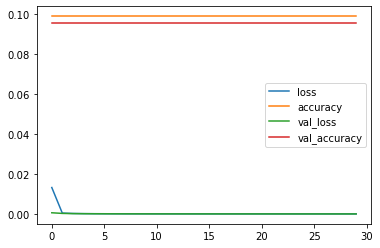

In [34]:
pd.DataFrame(history.history).plot()

In [35]:
model_cf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 18.3289 - accuracy: 0.0980


[18.328872680664062, 0.09799999743700027]

In [36]:
X_new=X_test[:3]

In [37]:
actual=y_test[:3]

In [38]:
actual

array([7, 2, 1], dtype=uint8)

In [39]:
y_prob=model_cf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 88ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<AxesSubplot:>

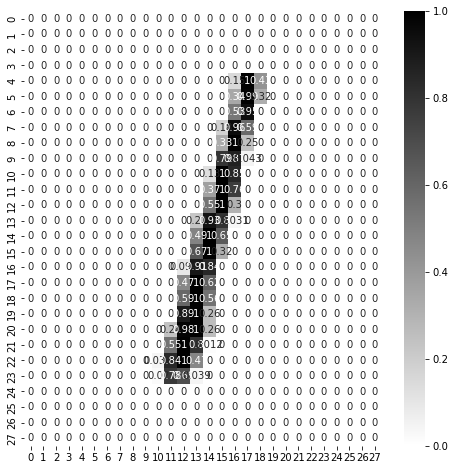

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2],annot=True,cmap='binary')

In [41]:
y_prob

array([[9.9999630e-01, 2.6487180e-07, 2.6553823e-07, 3.2302120e-07,
        1.1100736e-06, 8.1954916e-08, 6.2948305e-07, 1.9343149e-07,
        2.6522443e-07, 5.8433318e-07],
       [1.0000000e+00, 6.9148891e-09, 7.0092887e-09, 6.9286323e-09,
        2.0289557e-08, 1.7145807e-09, 3.6277068e-08, 3.1347958e-09,
        1.0866143e-08, 1.8980318e-08],
       [9.9994183e-01, 5.3882013e-06, 5.6681356e-06, 4.3822561e-06,
        1.3734291e-05, 3.0005904e-06, 9.1979236e-06, 2.6923474e-06,
        6.0196808e-06, 8.0518585e-06]], dtype=float32)

In [42]:
y_pred=np.argmax(y_prob,axis=-1)

In [43]:
y_pred

array([0, 0, 0], dtype=int64)

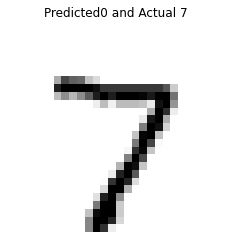

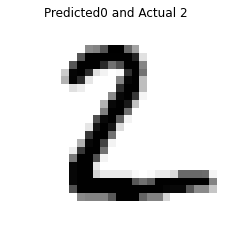

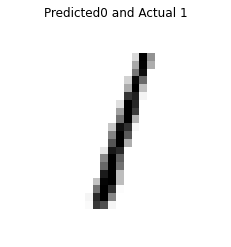

In [44]:
for data,pred,actual in zip(X_new,y_pred,actual):
    plt.imshow(data,cmap='binary')
    plt.title(f"Predicted{pred} and Actual {actual}")
    plt.axis('off')
    plt.show()

In [45]:
y_pred

array([0, 0, 0], dtype=int64)

In [46]:
import time 
def get_log_path(log_dir="logs/fit"):
    filename=time.strftime('log_%Y_%m_%d_%H_%M_%S')
    log_path=os.path.join(log_dir,filename)
    print(f"Saving logs at {log_path}")
    return log_path
log_dir=get_log_path()
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2023_06_07_14_17_48


In [47]:
#Early Stopping callback 

In [48]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [49]:
#model checkpoint callback

In [50]:
ckpt_path="Model_ckpt.h5"
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(ckpt_path,save_best_only=True)

In [51]:
epochs=30
validation=(X_valid,y_valid)

In [52]:
history=model_cf.fit(X_train,y_train,epochs=epochs,validation_data=validation,batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6103e-05 - accuracy: 0.0990 - val_loss: 1.2893e-05 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5564e-05 - accuracy: 0.0990 - val_loss: 1.2453e-05 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.5059e-05 - accuracy: 0.0990 - val_loss: 1.2043e-05 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4585e-05 - accuracy: 0.0990 - val_loss: 1.1657e-05 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.4140e-05 - accuracy: 0.0990 - val_loss: 1.1296e-05 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.3721e-05 - accuracy: 0.0990 - val_loss: 1.0955e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3326e-05 -

In [53]:
ekpt_model=tf.keras.models.load_model(ckpt_path)

In [54]:
history=ekpt_model.fit(X_train,y_train,epochs=10,validation_data=validation,batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 7.8515e-06 - accuracy: 0.0990 - val_loss: 6.1903e-06 - val_accuracy: 0.0958
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 7.7191e-06 - accuracy: 0.0990 - val_loss: 6.0831e-06 - val_accuracy: 0.0958
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 7.5906e-06 - accuracy: 0.0990 - val_loss: 5.9790e-06 - val_accuracy: 0.0958
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 7.4663e-06 - accuracy: 0.0990 - val_loss: 5.8785e-06 - val_accuracy: 0.0958
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 7.3462e-06 - accuracy: 0.0990 - val_loss: 5.7816e-06 - val_accuracy: 0.0958
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 7.2295e-06 - accuracy: 0.0990 - val_loss: 5.6868e-06 - val_accuracy: 0.0958
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 7.1167e-06 -

In [55]:
import time
import os
def save_model(MODEL_dir='TRAINED_MODEL'):
    os.makedirs(MODEL_dir,exist_ok=True)
    filename=time.strftime("Model_%Y_%m_%d_%H_%M_%S.h5")
    model_path=os.path.join(MODEL_dir,filename)
    print(f"Model{filename} will be saved at {model_path}")
    return model_path

In [56]:
Unique_path=save_model()
Unique_path

ModelModel_2023_06_07_14_21_51.h5 will be saved at TRAINED_MODEL\Model_2023_06_07_14_21_51.h5


'TRAINED_MODEL\\Model_2023_06_07_14_21_51.h5'

In [57]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [58]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.000008,0.098982,0.000006,0.0958
1,0.000008,0.098982,0.000006,0.0958
2,0.000008,0.098982,0.000006,0.0958
3,0.000007,0.098982,0.000006,0.0958
4,0.000007,0.098982,0.000006,0.0958
5,0.000007,0.098982,0.000006,0.0958
6,0.000007,0.098982,0.000006,0.0958
7,0.000007,0.098982,0.000006,0.0958
8,0.000007,0.098982,0.000005,0.0958
9,0.000007,0.098982,0.000005,0.0958


<AxesSubplot:>

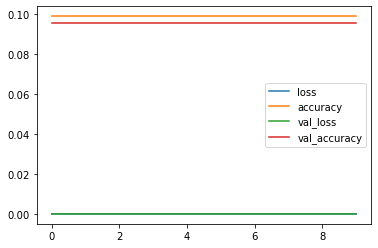

In [59]:
pd.DataFrame(history.history).plot()

In [60]:
model_cf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 19.6881 - accuracy: 0.0980


[19.688093185424805, 0.09799999743700027]

In [61]:
x_new=X_test[:3]

In [62]:
actual=y_test[:3]

In [63]:
actual

array([7, 2, 1], dtype=uint8)

In [64]:
y_prob=model_cf.predict(X_new)

1/1 [==============================] - 0s 22ms/step


In [65]:
y_prob.round(3)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
#load the model 
path_name_model="TRAINED_MODEL/Model_2023_06_05_18_45_29.h5"

In [67]:
loaded_model=tf.keras.models.load_model(path_name_model)

OSError: No file or directory found at TRAINED_MODEL/Model_2023_06_05_18_45_29.h5